*Dear TAs, I added the class late, and Josh said it was cool to submit the assignments late (3 weeks) without penalty. Thank you for your help and for your time! --Ashley *

Author: Ashley Koo 

Uni: hk2827

Class: Applied Deep Learning


### 1. Download the  mini-flowers  dataset. This contains 1,500 images of five different types of flowers. Modify one of the above notebooks to classify these images using transfer learning. How accurate of a model can you train?  


Let's get the mini_flowers dataset on gdrive and place import statements.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import os

import tensorflow as tf 
import zipfile

from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
# Prepare the input

# Initialize helpful directory paths 
base_dir = '/content/gdrive/My Drive/mini_flowers'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_1_dir = os.path.join(train_dir, 'daisy')
train_2_dir = os.path.join(train_dir, 'dandelion')
train_3_dir = os.path.join(train_dir, 'roses')
train_4_dir = os.path.join(train_dir, 'sunflowers')
train_5_dir = os.path.join(train_dir, 'tulips')

validation_1_dir = os.path.join(validation_dir, 'daisy')
validation_2_dir = os.path.join(validation_dir, 'dandelion')
validation_3_dir = os.path.join(validation_dir, 'roses')
validation_4_dir = os.path.join(validation_dir, 'sunflowers')
validation_5_dir = os.path.join(validation_dir, 'tulips')

# Get total number of train + val images
num_1_tr = len(os.listdir(train_1_dir))
num_2_tr = len(os.listdir(train_2_dir))
num_3_tr = len(os.listdir(train_3_dir))
num_4_tr = len(os.listdir(train_4_dir))
num_5_tr = len(os.listdir(train_5_dir))

num_1_val = len(os.listdir(validation_1_dir))
num_2_val = len(os.listdir(validation_2_dir))
num_3_val = len(os.listdir(validation_3_dir))
num_4_val = len(os.listdir(validation_4_dir))
num_5_val = len(os.listdir(validation_5_dir))

total_train = num_1_tr + num_2_tr + num_3_tr + num_4_tr + num_5_tr
total_val = num_1_val + num_2_val + num_3_val + num_4_val + num_5_val

# Resize input images to consistent shape (192 X 192)
TARGET_SHAPE = 150
BATCH_SIZE = 32

# Apply data augmentation 
# Train 
image_gen_train = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=45, 
                    width_shift_range=.15, 
                    height_shift_range=.15, 
                    horizontal_flip=True, 
                    zoom_range=0.5)

# Test
image_gen_val = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, # for 32 images  
                                               directory=train_dir, # from the train_dir 
                                               shuffle=True, # shuffles the training data
                                               target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                               class_mode='sparse' # 1D array of integer labels
                                                           )

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=validation_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='sparse')


Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


Next let's use VGG16 as our model with pre-trained weighting (Imagenet). We will take the approach of transfer learning whereby we add one more dense layer to VGG16,  then run the entire model on the input data (data augmentation is included).

In [7]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.Session(config = config)

In [8]:
# Import VGG16 -- use transfer learning 
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

EPOCHS = 10

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model 
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Epoch 1/10
16/16 [==============================] - 146s 9s/step - loss: 0.9696 - acc: 0.6240
 - 454s - loss: 1.4686 - acc: 0.5230 - val_loss: 0.9696 - val_acc: 0.6240
Epoch 2/10
16/16 [==============================] - 3s 216ms/step - loss: 0.7862 - acc: 0.7140
 - 10s - loss: 0.8428 - acc: 0.6780 - val_loss: 0.7862 - val_acc: 0.7140
Epoch 3/10
16/16 [==============================] - 3s 211ms/step - loss: 0.6473 - acc: 0.7720
 - 11s - loss: 0.7085 - acc: 0.7330 - val_loss: 0.6473 - val_acc: 0.7720
Epoch 4/10
16/16 [==============================] - 3s 212ms/step - loss: 0.9107 - acc: 0.6720
 - 11s - loss: 0.7030 - acc: 0.7130 - val_loss: 0.9107 - val_acc: 0.6720
Epoch 5/10
16/16 [==============================] - 3s 210ms/step - loss: 0.6921 - acc: 0.7460
 - 11s - loss: 0.7068 - acc: 0.7420 - val_loss: 0.6921 - val_acc: 0.7460
Epoch 6/10
16/16 [==============================] - 3s 211ms/step - loss: 0.7017 - acc: 0.7600
 - 11s - loss: 0.6199 - acc: 0.7680 - val_loss: 0.7017 - val_acc:

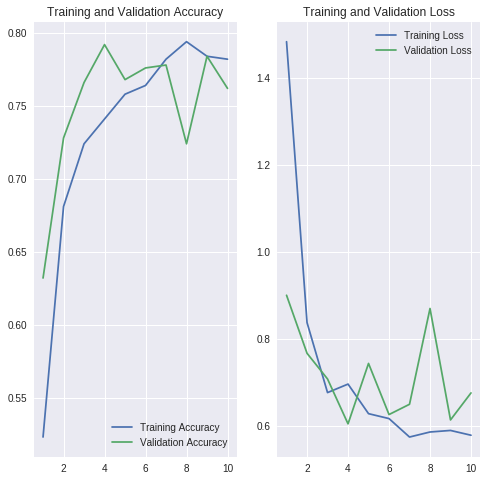

In [23]:
# Plot Accuracy & Loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We find that not only were we able to avoid overfitting thanks to i) data augmentation, we also achieved high (close to 0.8 after 10 epochs) thanks to the benefits of transfer learning!

Note that using 512-dense layer yielded a better training accuracy (0.6751) over using a 256-dense layer (training accuracy: 0.65).

### 2. Next, we run experiments using at least two pretrained convolutional bases ( applications ), and compare your results. Include a short, informal write-up (using bullet points is fine). What differences do you see, and why? Read the associated papers to learn more about the networks you’re using, linked from the API doc.

First, let's check out ResNet50 as our convolutional base. Recall that VGG16 was used for part 1.

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/10
16/16 [==============================] - 6s 356ms/step - loss: 12.8567 - acc: 0.2000
 - 15s - loss: 9.1854 - acc: 0.3910 - val_loss: 12.8567 - val_acc: 0.2000
Epoch 2/10
16/16 [==============================] - 3s 166ms/step - loss: 12.6173 - acc: 0.1940
 - 10s - loss: 8.5963 - acc: 0.4660 - val_loss: 12.6173 - val_acc: 0.1940
Epoch 3/10
16/16 [==============================] - 3s 166ms/step - loss: 10.6954 - acc: 0.1960
 - 11s - loss: 9.1596 - acc: 0.4250 - val_loss: 10.6954 - val_acc: 0.1960
Epoch 4/10
16/16 [==============================] - 3s 170ms/step - loss: 12.7612 - acc: 0.2000
 - 11s - loss: 8.5843 - acc: 0.4700 - val_loss: 12.7612 - val_acc: 0.2000
Epoch 5/10
16/16 [==============================] - 3s 166ms/step - loss: 12.7352 - acc: 0.2000
 - 11s - loss: 7.9325 - acc: 0.4980 - val_loss: 12.7352 - val_acc: 0.2000
Epoch 6/10
16/16 [==============================] - 3s 168ms/step - loss: 12.7706 - acc: 0.2060
 - 11s - loss: 8.6875 - acc: 0.4630 - val_loss: 12.770

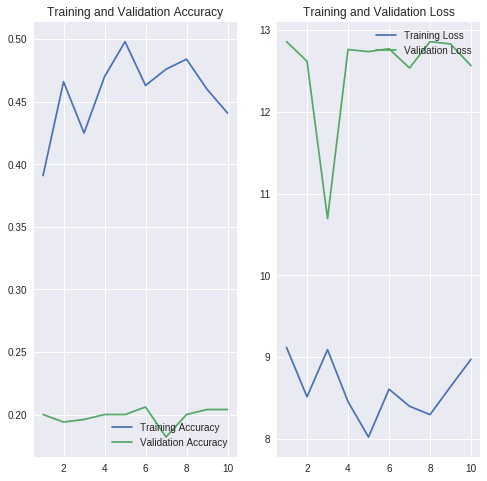

In [24]:
# Import ResNet50
conv_base = ResNet50(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

# Add another layel to ResNet50 like we did for VGG16
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(5, activation='softmax')) 

# Avoid messing up the good pre-trained model
conv_base.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model 
EPOCHS = 10
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

# Plot acc, loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

With ResNet50, even with data augmentation we see severe overfitting, where the validation accuracy hovers around 0.20. In addition, training accuracy does not rise above 0.50. The same situation is seen for training and validation loss. 

With InceptionV3, we see the following. 


Epoch 1/10
16/16 [==============================] - 6s 368ms/step - loss: 8.2460 - acc: 0.4160
 - 16s - loss: 9.6537 - acc: 0.2610 - val_loss: 8.2460 - val_acc: 0.4160
Epoch 2/10
16/16 [==============================] - 3s 166ms/step - loss: 6.5793 - acc: 0.4520
 - 9s - loss: 7.6502 - acc: 0.3710 - val_loss: 6.5793 - val_acc: 0.4520
Epoch 3/10
16/16 [==============================] - 3s 167ms/step - loss: 1.8055 - acc: 0.7020
 - 10s - loss: 3.1674 - acc: 0.5310 - val_loss: 1.8055 - val_acc: 0.7020
Epoch 4/10
16/16 [==============================] - 3s 167ms/step - loss: 1.5392 - acc: 0.6980
 - 10s - loss: 1.7338 - acc: 0.6190 - val_loss: 1.5392 - val_acc: 0.6980
Epoch 5/10
16/16 [==============================] - 3s 164ms/step - loss: 1.2571 - acc: 0.7160
 - 10s - loss: 1.5020 - acc: 0.6490 - val_loss: 1.2571 - val_acc: 0.7160
Epoch 6/10
16/16 [==============================] - 3s 166ms/step - loss: 1.1484 - acc: 0.7160
 - 10s - loss: 1.2667 - acc: 0.6770 - val_loss: 1.1484 - val_acc: 

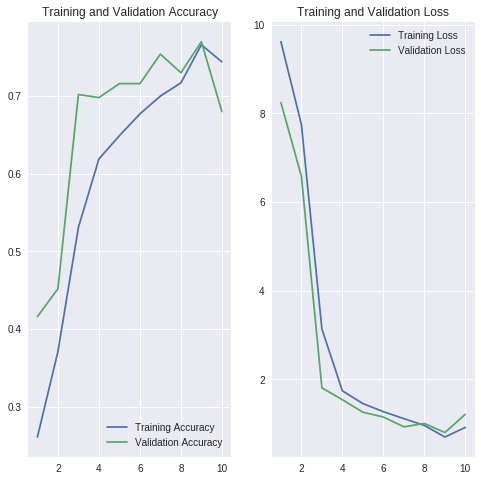

In [25]:
# Import the pre-trained model
conv_base = InceptionV3(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

# Add another layel to ResNet50 like we did for VGG16
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(5, activation='softmax')) 

# Avoid messing up the good pre-trained model
conv_base.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model 
EPOCHS = 10
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

# Plot acc, loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The InceptionV3 model is phenomenal! Not only is overfitting virtually nonexistent, but the learning rate reaches ~0.8 in just 9 epochs.

The reason why ResNet50, for all popularity in the research community, did not do so well was hard to find. Perhaps its way of incorporating identity shortcuts is incompatible with the mini_flowers dataset, or more likely, its pre-trained weights were not useful for the mini_flowers dataset due to particular features that were necessary to classify the mini_flowers that were not captured by ImageNet. This seems unlikely, however, since ImageNet was used to train other models like VGG16 and InceptionV3. 

As for the reason why InceptionV3 gave such great performance, a concept called factorizing convolutions came up as the main addition to version 3 of Inception. Apparently, the model is "the culmination of many ideas developed by multiple researchers over the years." It would be interesting to study the model more in depth! 